In [79]:
!pip install tensorflow

^C
Traceback (most recent call last):
  File "/Users/junior/opt/anaconda3/bin/pip", line 7, in <module>
    from pip._internal.cli.main import main
  File "/Users/junior/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/Users/junior/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/Users/junior/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/Users/junior/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  File "/Users/junior/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/parser.py", line 12, in <module>
    from pip._internal.configura

In [81]:
#Import packages
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [82]:
#Loading dataset
from keras.datasets import cifar10
#split into training and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [83]:
#datatypes
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [84]:
#array shapes
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [85]:
#Image as an array
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

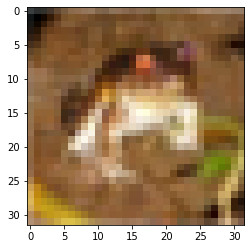

In [86]:
#display image
img = plt.imshow(x_train[index])

In [87]:
#Image label
print('The image label is:', y_train[index])

The image label is: [6]


In [88]:
#Images classification
classification = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#print image class
print('Image class is:', classification[y_train[index][0]])

Image class is: frog


In [89]:
#Creating 10 inputs for neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [90]:
#normalise pixels to be between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [91]:
#model architecture 
model = Sequential()

#Add Convolutional layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

#Add Pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Second Convolution layer
model.add(Conv2D(32, (5,5), activation='relu') )

#Second Pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Flattening layer
model.add(Flatten())

#Layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#dropout layer
model.add(Dropout(0.5))

#Layer with 500 neurons
model.add(Dense(500, activation='relu'))

#dropout layer
model.add(Dropout(0.5))

#Layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [92]:
#compile model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [93]:
#train model
hist = model.fit(x_train, y_train_one_hot,
                batch_size = 256,
                epochs = 10,
                validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 24s 146ms/step - loss: 1.7859 - accuracy: 0.3280 - val_loss: 1.5471 - val_accuracy: 0.4436
Epoch 2/10
157/157 [==============================] - 22s 140ms/step - loss: 1.4222 - accuracy: 0.4747 - val_loss: 1.2976 - val_accuracy: 0.5350
Epoch 3/10
157/157 [==============================] - 22s 139ms/step - loss: 1.2776 - accuracy: 0.5385 - val_loss: 1.2148 - val_accuracy: 0.5579
Epoch 4/10
157/157 [==============================] - 23s 148ms/step - loss: 1.1778 - accuracy: 0.5785 - val_loss: 1.1319 - val_accuracy: 0.5890
Epoch 5/10
157/157 [==============================] - 22s 143ms/step - loss: 1.1100 - accuracy: 0.6036 - val_loss: 1.1063 - val_accuracy: 0.6028
Epoch 6/10
157/157 [==============================] - 22s 143ms/step - loss: 1.0319 - accuracy: 0.6335 - val_loss: 1.0489 - val_accuracy: 0.6264
Epoch 7/10
157/157 [==============================] - 21s 135ms/step - loss: 0.9813 - accuracy: 0.6521 - val_loss: 1.0233 - val_ac

In [94]:
model.evaluate(x_train, y_train_one_hot)[1]

1563/1563 [==============================] - 9s 6ms/step - loss: 0.6926 - accuracy: 0.7661


0.7660800218582153

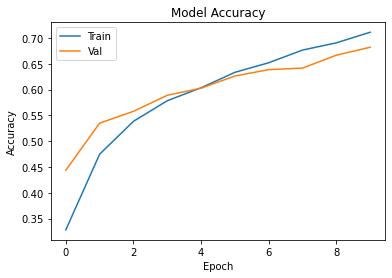

In [95]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

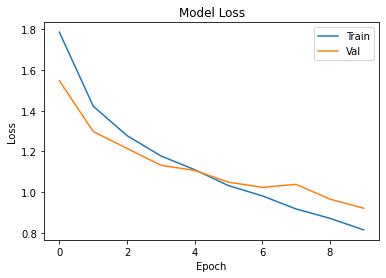

In [96]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

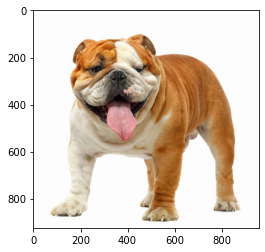

In [102]:
#Model Test
test = plt.imread('testimg.jpg')
plt.imshow(test)

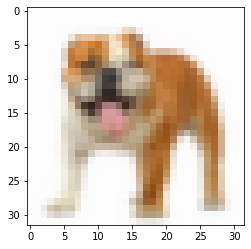

In [103]:
#Resized image
from skimage.transform import resize
resized_image = resize(test, (32,32,3))
img = plt.imshow(resized_image)

In [104]:
prediction = model.predict(np.array([resized_image]))
prediction

1/1 [==============================] - 0s 19ms/step


array([[3.5833470e-03, 2.3682512e-04, 2.6868375e-02, 2.4012569e-01,
        2.4233367e-02, 5.8451253e-01, 1.4779978e-02, 1.0517565e-01,
        9.2954913e-05, 3.9123575e-04]], dtype=float32)

In [105]:
#sort predictions
list_index = [0,1,2,3,4,5,6,7,8,9]
x = prediction

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
            
print(list_index)

[5, 3, 7, 2, 4, 6, 0, 9, 1, 8]


In [106]:
#listing top 5 predictions
for i in range(5):
    print(classification[list_index[i]], ':', round(prediction[0][list_index[i]] * 100, 2), '%')

dog : 58.45 %
cat : 24.01 %
horse : 10.52 %
bird : 2.69 %
deer : 2.42 %
